In [1]:
import numpy as np
import matplotlib.pylab as plt
from __future__ import division
import time

In [2]:
# Burer-Monteiro Utils
def proj_tang(u,sigma):
    return u-np.diag(np.diag(u.dot(sigma.T))).dot(sigma)

def proj_mani(sigma):
    res=sigma/np.outer(np.sqrt(np.sum(sigma**2,axis=1)),np.ones(sigma.shape[1]))
    return res

def gradf(sigma,reg):
    n=sigma.shape[0]
    return 2*((B+reg*np.eye(n))-np.diag(np.diag((B+reg*(np.eye(n))).dot(sigma).dot(sigma.T)))).dot(sigma)
#     return 2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(sigma)

def max_eachrow(X):
    res=np.zeros(X.shape)
    idx=np.abs(X).argmax(axis=1)
    for row in range(res.shape[0]):
        res[row,idx[row]]=np.sign(X[row,idx[row]])
    return res

def softth(X,thres):
    return np.sign(X)*np.maximum(np.abs(X)-thres,0)



# SDP Utils
def proj_simplex(v, s=1):
    n = v.shape[0]
    if v.sum() == s and np.alltrue(v >= 0):
        return v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    theta = float(cssv[rho] - s) / rho
    w = (v - theta).clip(min=0)
    return w

def proj_l1(v, s=1):
    n = v.shape[0]
    u = np.abs(v)
    if u.sum() <= s:
        return v
    w = proj_simplex(u, s=s)
    w *= np.sign(v)
    return w

def proj_1inf(Y,lamb):
    res=np.zeros((Y.shape))
    for i in range(Y.shape[0]):
        res[i,:]=Y[i,:]-proj_l1(Y[i,:],lamb)
    return res

def proj_A(X):
    n=X.shape[0]
    temp1=np.append((X-np.diag(np.diag(X))).dot(np.ones(n))*2,np.diag(X))-b
    mu1,nu1=temp1[:n],temp1[n:]
    temp2=np.append(1/(2*(n-2))*(mu1-np.ones(n)*(np.sum(mu1)/(2*n-2))),nu1)
    mu2,nu2=temp2[:n],temp2[n:]
    temp=np.outer(mu2,np.ones(n))
    res=X-((temp+temp.T-2*np.diag(mu2))+np.diag(nu2))
    return res

def proj_B(X):
    res=X-np.diag(np.diag(X)-b)
    return res

def proj_psd(X):
    w,v=np.linalg.eig((X+X.T)/2)
    idx=(w>=0)
    res=v[:,idx].dot(np.diag(w[idx])).dot(v[:,idx].T)
    return res

def softth(X,lamb):
    return np.sign(X)*np.maximum(np.abs(X)-lamb,0)

In [123]:

# Balanced
p,q=.2,.1
Psi=np.asarray([
    [p,q],
    [q,p]
])


# Psi=np.asarray([
#     [.200,.100,.120,.100],
#     [.100,.200,.100,.120],
#     [.120,.100,.200,.100],
#     [.100,.120,.100,.200]
# ])

n=400
# a,b=p*n,q*n
# d=(a+b)/2
Z_gt=np.asarray([1,0]*(n)+[0,1]*(n)).reshape(2*n,2)
# Z_gt=np.asarray([1,0,0,0]*(n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(4*n,4)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
X_gt=Z_gt.dot(Z_gt.T)*2-1

A=np.random.binomial(1,Mz)
n=A.shape[0]
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))
# lamb=d/n



# Unbalanced
# Psi=np.asarray([
#     [.200,.100,.120,.100],
#     [.100,.200,.100,.120],
#     [.120,.100,.200,.100],
#     [.100,.120,.100,.200]
# ])

# Psi=np.asarray([
#     [.300,.080,.100,.080],
#     [.080,.200,.080,.100],
#     [.100,.080,.200,.080],
#     [.080,.100,.080,.200]
# ])

# n=300
# # Z_gt=np.asarray([1,0,0,0]*(2*n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(5*n,4)
# Z_gt=np.asarray([1,0,0,0]*(3*n)+[0,1,0,0]*(2*n)+[0,0,1,0]*(2*n)+[0,0,0,1]*(n)).reshape(8*n,4)
# Mz=Z_gt.dot(Psi).dot(Z_gt.T)
# X_gt=Z_gt.dot(Z_gt.T)



# A=np.random.binomial(1,Mz)
# n=A.shape[0]
# A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
# lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))

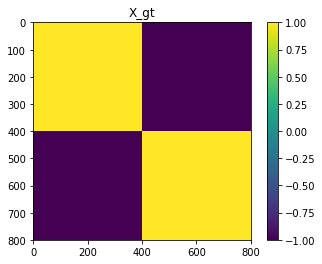

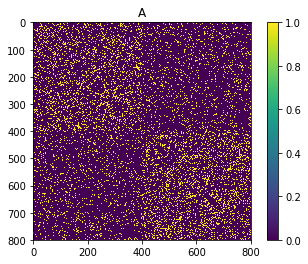

In [124]:
# plt.figure(figsize=(14,7))
# plt.subplot(131)
# plt.title('Mz')
# plt.imshow(Mz)

# plt.subplot(132)
plt.figure()
plt.title('X_gt')
plt.imshow(X_gt)
plt.colorbar()
plt.show()

# plt.subplot(133)
plt.figure()
plt.title('A')
plt.imshow(A)
plt.colorbar()
plt.show()

In [125]:
k=int(np.sqrt(2*n))+1
# k=5
sigma0=proj_mani(np.random.rand(n,k))
# sigma0=np.vstack((np.eye(k),np.zeros((n-k,k))))

eta:  0.5
0 -iter
grad_size:  370.21787585332095
diff between sigma and gt 1002.4404959389673
diff between two sigmas 0.49991776412125466
num of zeros of sigma: 0


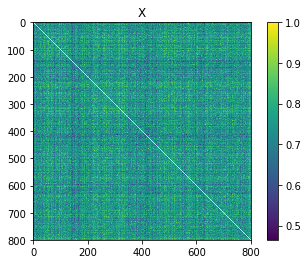

100 -iter
grad_size:  335.5944467894473
diff between sigma and gt 87.58753591504527
diff between two sigmas 0.4999199032262943
num of zeros of sigma: 0


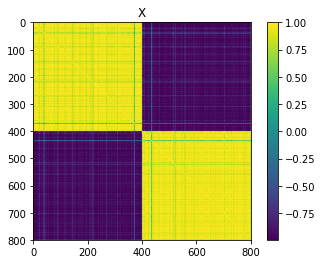

200 -iter
grad_size:  36.24461961450901
diff between sigma and gt 0.49314323970045887
diff between two sigmas 0.492380775989558
num of zeros of sigma: 0


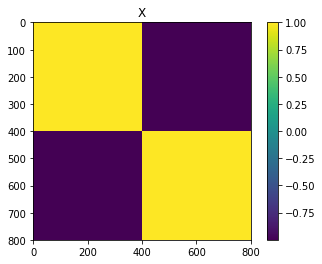

300 -iter
grad_size:  36.2398485576637
diff between sigma and gt 0.5020310269227762
diff between two sigmas 0.49208360304245813
num of zeros of sigma: 0


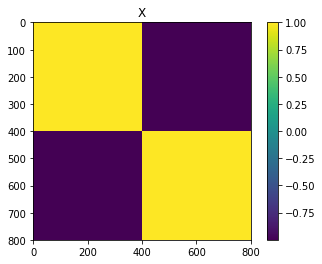

400 -iter
grad_size:  36.23913630162593
diff between sigma and gt 0.5046112661734171
diff between two sigmas 0.49199852525882226
num of zeros of sigma: 0


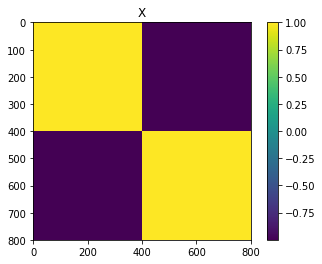

elapsed time:  25.75215458869934
eta:  1
0 -iter
grad_size:  370.21787585332095
diff between sigma and gt 1002.1685393668582
diff between two sigmas 0.9993430035205785
num of zeros of sigma: 0


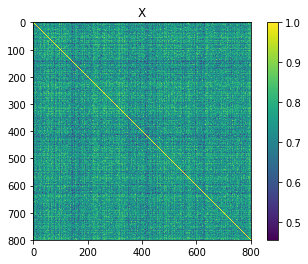

100 -iter
grad_size:  62.318174738548564
diff between sigma and gt 1.596107499488399
diff between two sigmas 0.9745440184887163
num of zeros of sigma: 0


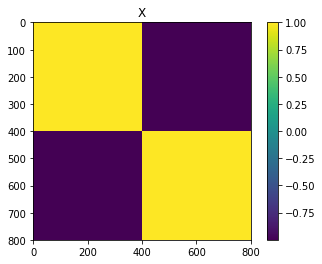

200 -iter
grad_size:  62.49856182911579
diff between sigma and gt 1.5551665831965804
diff between two sigmas 0.9760284537720769
num of zeros of sigma: 0


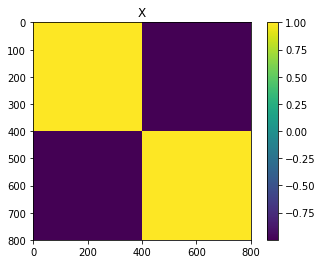

300 -iter
grad_size:  62.50835350452022
diff between sigma and gt 1.5545812810076387
diff between two sigmas 0.9760660245183418
num of zeros of sigma: 0


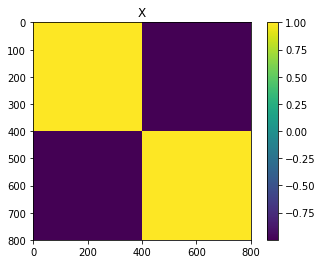

400 -iter
grad_size:  62.50716618217608
diff between sigma and gt 1.5581390077974813
diff between two sigmas 0.975956279816522
num of zeros of sigma: 0


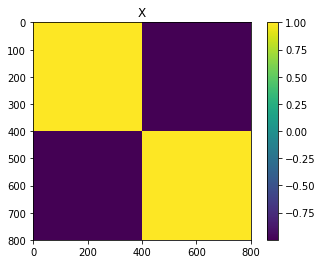

elapsed time:  25.050177335739136
eta:  5
0 -iter
grad_size:  370.21787585332095
diff between sigma and gt 993.2756885924823
diff between two sigmas 4.921197202824993
num of zeros of sigma: 0


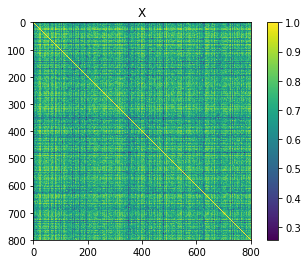

100 -iter
grad_size:  389.72440998279984
diff between sigma and gt 6.212869409630365
diff between two sigmas 4.708374522315909
num of zeros of sigma: 0


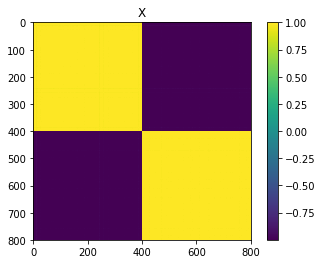

200 -iter
grad_size:  389.80600743895513
diff between sigma and gt 6.223527840016345
diff between two sigmas 4.708320090498089
num of zeros of sigma: 0


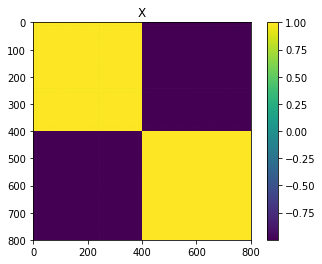

300 -iter
grad_size:  389.8153453180306
diff between sigma and gt 6.224136810709229
diff between two sigmas 4.708404860207661
num of zeros of sigma: 0


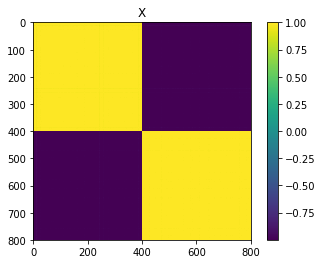

400 -iter
grad_size:  389.8172675817148
diff between sigma and gt 6.224525863649598
diff between two sigmas 4.708435479788836
num of zeros of sigma: 0


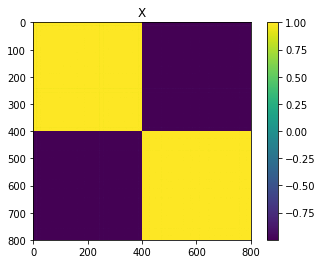

elapsed time:  26.38670539855957


In [128]:
B=A-lamb*np.ones((n,n))
for eta in [.5,1,5]:
# eta=5
    print('eta: ',eta)
    max_iter=500
    # k=5
    # sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
    # sigma=proj_mani(np.random.rand(n,k))
    sigma=sigma0
    init=time.time()
    for it in range(max_iter):
        sigma_old=sigma
        grad=gradf(sigma,0)
        grad_size=np.linalg.norm(grad)

        # Grad-step
        u=grad/grad_size
    #     eta=np.linalg.norm(B,ord=2)/(20*np.linalg.norm(B,ord=1))

        # update sigma
        sigma=sigma+(eta)*u
#         sigma=np.maximum(sigma,0)
        sigma=proj_mani(sigma)

    #     # update with projection-free
    #     gamma=1/(it+1)
    #     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)

        if(it%(max_iter/5)==0):
            print(it,'-iter')
            print('grad_size: ',grad_size)
            print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
            print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
            print('num of zeros of sigma:',np.sum(sigma==0))

            plt.figure(1)
            plt.title('X')
            plt.imshow(sigma.dot(sigma.T))
            plt.colorbar()
            plt.show()

    #         plt.figure(1)
    #         plt.title('histogram of sigma.dot(sigma.T)')
    #         plt.hist(sigma.dot(sigma.T), bins='auto')
    #         plt.show()

    #         plt.figure(figsize=(8,8))
    #         plt.title('sigma')
    #         plt.imshow(sigma)
    #         plt.colorbar()
    #         plt.show()

    #         plt.figure(1)
    #         plt.title('histogram of sigma')
    #         plt.hist(sigma, bins='auto')
    #         plt.show()

    print('elapsed time: ',time.time()-init)
    print('===============================')


In [98]:
tmp=np.asarray([[.15,.25],[.2,-.003]])
print(tmp)
print(np.linalg.norm(tmp,1))
np.sum(np.abs(tmp),axis=0)

[[ 0.15   0.25 ]
 [ 0.2   -0.003]]
0.35


array([0.35 , 0.253])

k:  40
0 -iter
eta:  0.009268484857194732
grad_size:  376.194242884942
diff between sigma and gt 449.1515018782771
diff between two sigmas 0.009268484337511717
num of zeros of sigma: 0


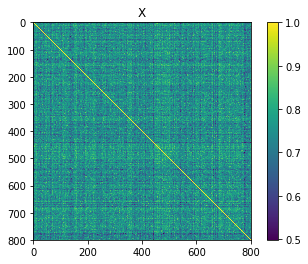

60 -iter
eta:  0.009268484857194732
grad_size:  375.72879409780313
diff between sigma and gt 449.01509862648106
diff between two sigmas 0.0092684843403333
num of zeros of sigma: 0


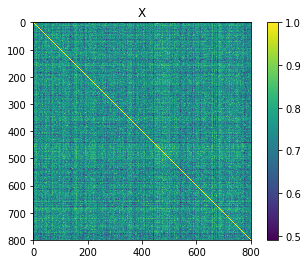

120 -iter
eta:  0.009268484857194732
grad_size:  376.4677040928642
diff between sigma and gt 448.5933670359289
diff between two sigmas 0.009268484332894554
num of zeros of sigma: 0


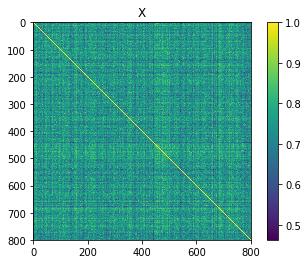

180 -iter
eta:  0.009268484857194732
grad_size:  378.38192828033596
diff between sigma and gt 447.89717597126344
diff between two sigmas 0.009268484316251368
num of zeros of sigma: 0


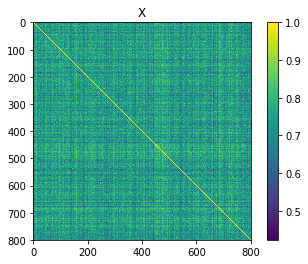

240 -iter
eta:  0.009268484857194732
grad_size:  381.3989169729471
diff between sigma and gt 446.94700237168195
diff between two sigmas 0.009268484292198386
num of zeros of sigma: 0


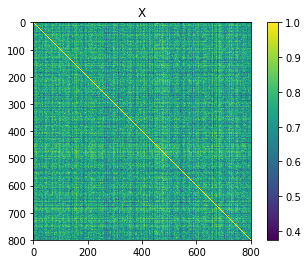

elapsed time:  84.98879218101501


In [109]:
B=A-lamb*np.ones((n,n))
eta=5
max_iter=300
k=int(np.sqrt(2*n))
print('k: ',k)
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
# sigma=proj_mani(np.random.rand(n,k))
sigma=sigma0
init=time.time()
for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma,0)
    grad_size=np.linalg.norm(grad)
    eta=np.linalg.norm(B,ord=2)/(20*np.linalg.norm(B,ord=1))
#     eta=2*np.sum(sigma*(B-np.diag(np.diag(np.diag(B.dot(sigma).dot(sigma.T))))).dot(sigma))/(100*np.linalg.norm(B,ord=1))
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
    sigma=sigma+(eta)*u
#     sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
    
    if(it%(max_iter/5)==0):
        print(it,'-iter')
        print('eta: ',eta)
        print('grad_size: ',grad_size)
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
        
print('elapsed time: ',time.time()-init)
